# Implementing a Perceptron

### Perceptron is a fundamental unit of the neural network which takes weighted inputs, process it and is capable of performing binary classifications

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sns.set()

In [3]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
   """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
            Parameters
            ----------
            X : {array-like}, shape = [n_examples, n_features]
                Training vectors, where n_examples is the number of
                examples and n_features is the number of features.
            
            y : array-like, shape = [n_examples]
                Target values.
            
            Returns
            -------
            self : object
            """
        rng =  np.random.RandomState(self.random_state)
        self.w_ = rng.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for feature, target in zip(X, y):
                update = self.eta * (target - self.predict(feature))
                self.w_[1:] += update * feature
                self.w_[0] += update # bias unit1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    
    def net_input(self, X):
        '''Calculate the net input '''
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, [0,2]]

y = iris.target[:100]
y = np.where(y == 0, -1, 1)

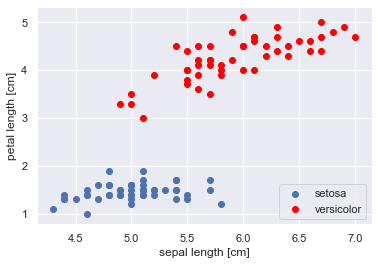

In [5]:
# plot the sepal length against the sepal width
plt.scatter(X[:50, 0], X[:50, 1], label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], label='versicolor', color='red')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='lower right')
plt.show()

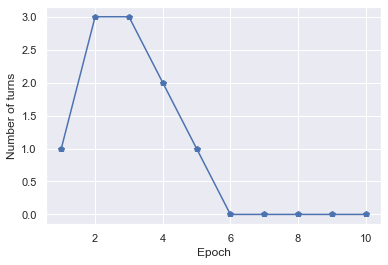

In [6]:
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, 'pb')
plt.xlabel('Epoch')
plt.ylabel('Number of turns')

plt.show()

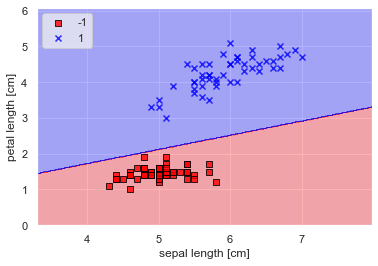

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
#     plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
       
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaptive linear neurons and the convergence of learning

### Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights

In [8]:
# implementation 

class AdalineGD(object):
    '''ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
    
    '''
    
    def __init__(self, eta, n_iter, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, Y):
        """ Fit training data.
    Parameters
    ----------
    X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples
        is the number of examples and
        n_features is the number of features.
    y : array-like, shape = [n_examples]
        Target values.

    Returns
    -------
    self : object
    """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

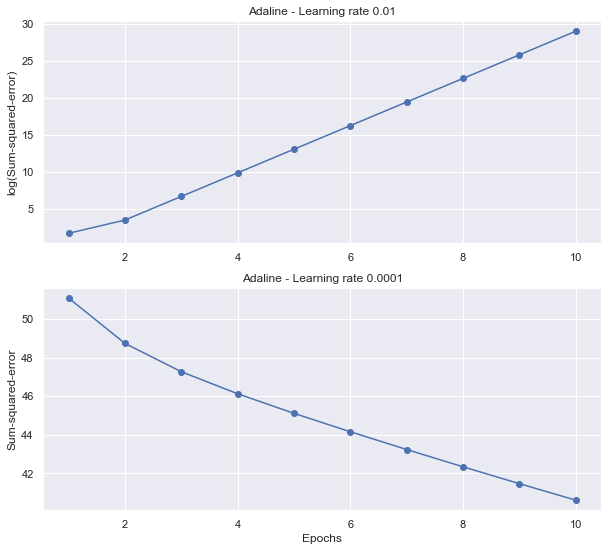

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10, 9))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

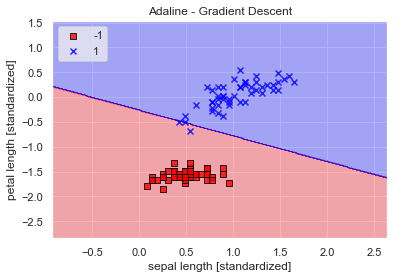

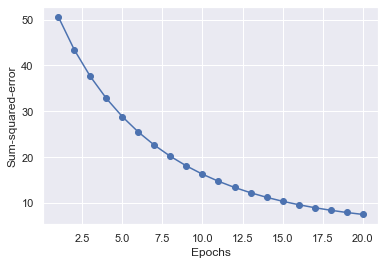

In [10]:
X_std = X.copy()
X_std[:, 0] = (X[:, 0] - X.mean()) / X.std()
X_std[:, 1] = (X[:, 1] - X.mean()) / X.std()

ada1 =AdalineGD(eta=0.001, n_iter=20).fit(X_std, y)
ada1.predict(X_std)

plot_decision_regions(X_std, y, classifier=ada1)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()